In [71]:
import numpy as np
TestPerf = np.load("Test_Performance_CIFAR_FF_10.npy")
ValError = np.load("Val_Acc_Record_CIFAR_FF_10.npy")

In [72]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

10


In [73]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [74]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [75]:
TestPerf_Mean

array([[1.82625042, 0.44531999],
       [1.89689046, 0.44223999],
       [1.87001644, 0.43978998]])

In [76]:
TestPerf_Mean + TestPerf_StE

array([[1.82960517, 0.44684372],
       [1.90066934, 0.44349268],
       [1.8739211 , 0.44093859]])

In [77]:
TestPerf_Mean - TestPerf_StE

array([[1.82289567, 0.44379625],
       [1.89311158, 0.4409873 ],
       [1.86611178, 0.43864138]])

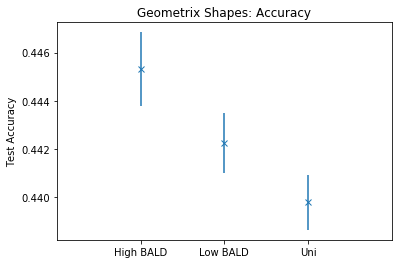

In [78]:
import matplotlib.pyplot as plt

flag = 1

plt.errorbar(np.array([1,2,3],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['High BALD','Low BALD','Uni']
plt.xticks(np.array([1,2,3],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,4)
# thisplot.set_ylim(0.435,0.45)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

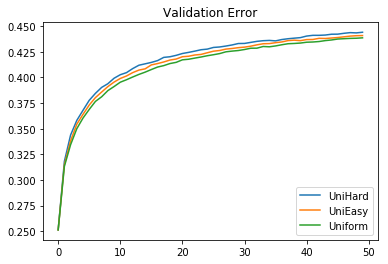

In [79]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

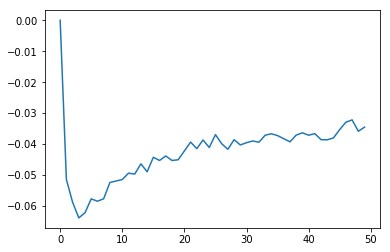

In [26]:
Diff = np.mean(ValError[:,0,:],axis=1) - np.mean(ValError[:,-1,:],axis=1)
plt.plot(Diff)
plt.show()

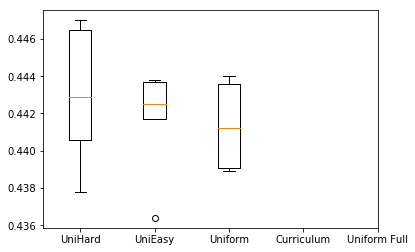

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,1,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()

In [2]:
import numpy as np

Results = np.load('CIFAR_Dynamic_Perf_BALD_Easy.npy')
Results = Results.transpose()
Results = Results[0:2,:]

Results2 = np.load('CIFAR_Dynamic_Perf_BALD_Easy_2.npy')
Results2 = Results2.transpose()
Results2 = Results2[0:3,:]

Results = np.append(Results,Results2,axis=0)
UniResults = np.load('CIFAR_Dynamic_Perf_BALD_Easy_Uni.npy')
UniResults = UniResults.transpose()
UniResults = UniResults[0:5,:]
MeanUniResults = np.mean(UniResults,axis=0)
StdUniResults = np.std(UniResults,axis=0)/np.sqrt(5)

HardUniResults = np.load('CIFAR_Dynamic_Perf_BALD_Hard_Uni.npy')
HardUniResults = HardUniResults.transpose()
HardUniResults = HardUniResults[0:5,:]
MeanHardUniResults = np.mean(HardUniResults,axis=0)
StdHardUniResults = np.std(HardUniResults,axis=0)/np.sqrt(5)

HardPropResults = np.load('CIFAR_Dynamic_Perf_BALD_Hard_PropTask.npy')
HardPropResults = HardPropResults.transpose()
HardPropResults = HardPropResults[0:5,:]
MeanHardPropResults = np.mean(HardPropResults,axis=0)
StdHardPropResults = np.std(HardPropResults,axis=0)/np.sqrt(5)



In [3]:
MeanResults = Results.mean(axis=0)
StdResults = Results.std(axis=0)/np.sqrt(Results.shape[0])

MeanResults = np.append(MeanResults,MeanUniResults[1])
StdResults = np.append(StdResults,StdUniResults[1])

MeanResults = np.append(MeanResults,MeanHardUniResults[1])
StdResults = np.append(StdResults,StdHardUniResults[1])

MeanResults = np.append(MeanResults,MeanHardPropResults[1])
StdResults = np.append(StdResults,StdHardPropResults[1])

In [4]:
MeanResults

array([0.71256, 0.72738, 0.72192, 0.7296 , 0.7245 ])

In [5]:
StdResults

array([0.00438521, 0.00197269, 0.00428713, 0.00131666, 0.00128655])

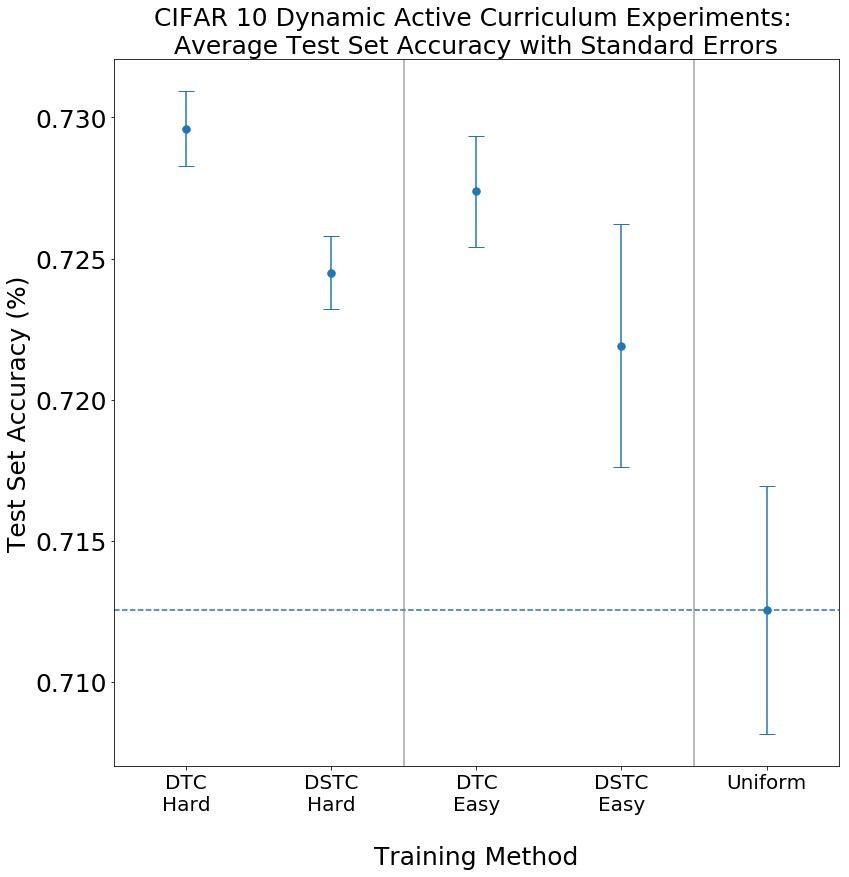

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13, 13))
ax.errorbar(np.array([1,2,3,4,5],dtype=int),MeanResults[[3,4,1,2,0]],yerr = StdResults[[3,4,1,2,0]],marker ='.',linestyle='none',markersize=15,capsize = 8)
my_xticks = ['DTC\nHard','DSTC\nHard','DTC\nEasy','DSTC\nEasy','Uniform']
thisplot = plt.gca()
thisplot.set_xlim(0.5,5.5)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.title('CIFAR 10 Dynamic Active Curriculum Experiments: \nAverage Test Set Accuracy with Standard Errors',fontsize = 25)
plt.xlabel('\nTraining Method',fontsize = 25)
plt.ylabel('Test Set Accuracy (%)',fontsize = 25)
ax.axhline(y=MeanResults[0],linestyle='--')
ax.axvline(x=2.5,linestyle='-',c='grey',alpha=0.7)
ax.axvline(x=4.5,linestyle='-',c='grey',alpha=0.7)
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks,fontsize=20)
plt.show()

In [73]:
fig.savefig('CIFAR_Dynamic_Results.png')

In [27]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def one_hot(label_list):
    NumLabels = len(label_list)
    MaxLabel = max(label_list)
    one_hot_labels = np.zeros([NumLabels,MaxLabel+1],dtype=int)
    for i in range(NumLabels):
        one_hot_labels[i,label_list[i]-1] = 1

    return one_hot_labels

def one_hot_reverse(one_hot_labels):
    labels = []
    for i in range(one_hot_labels.shape[0]):
        Sample = one_hot_labels[i,:]
        labels.append(Sample.argmax())

    return np.asarray(labels)

InitStr = 'cifar-10-python\cifar-10-batches-py\data_batch_'
File = InitStr + np.str(1)
Batch = unpickle(File)
FullInputs = Batch[b'data']
FullTargets = one_hot(Batch[b'labels'])

FullInputs = np.reshape(FullInputs,[FullInputs.shape[0],3,32,32]).transpose(0,2,3,1)


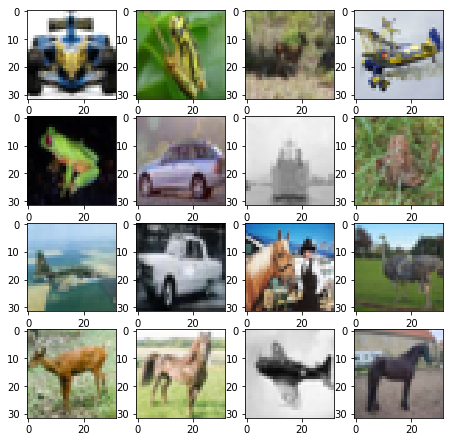

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7.5, 7.5))
randind = np.random.randint(0,FullInputs.shape[0],size = 16)
axes[0,0].imshow(FullInputs[randind[0],:,:,:])
axes[1,0].imshow(FullInputs[randind[1],:,:,:])
axes[2,0].imshow(FullInputs[randind[2],:,:,:])
axes[3,0].imshow(FullInputs[randind[3],:,:,:])
axes[0,1].imshow(FullInputs[randind[4],:,:,:])
axes[1,1].imshow(FullInputs[randind[5],:,:,:])
axes[2,1].imshow(FullInputs[randind[6],:,:,:])
axes[3,1].imshow(FullInputs[randind[7],:,:,:])
axes[0,2].imshow(FullInputs[randind[8],:,:,:])
axes[1,2].imshow(FullInputs[randind[9],:,:,:])
axes[2,2].imshow(FullInputs[randind[10],:,:,:])
axes[3,2].imshow(FullInputs[randind[11],:,:,:])
axes[0,3].imshow(FullInputs[randind[12],:,:,:])
axes[1,3].imshow(FullInputs[randind[13],:,:,:])
axes[2,3].imshow(FullInputs[randind[14],:,:,:])
axes[3,3].imshow(FullInputs[randind[15],:,:,:])
plt.show()

In [64]:
fig.savefig('CIFARExamples.png')

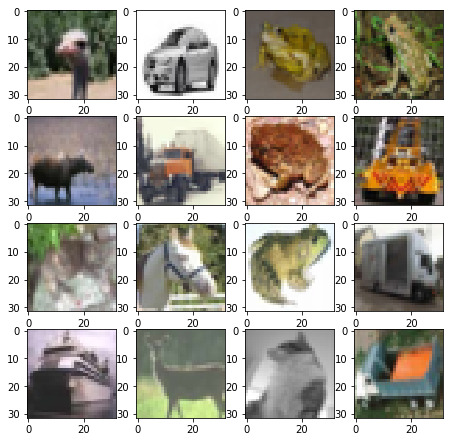

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7.5, 7.5))
randind = np.random.randint(0,FullInputs.shape[0],size = 16)
axes[0,0].imshow(FullInputs[randind[0],:,:,:])
axes[1,0].imshow(FullInputs[randind[1],:,:,:])
axes[2,0].imshow(FullInputs[randind[2],:,:,:])
axes[3,0].imshow(FullInputs[randind[3],:,:,:])
axes[0,1].imshow(FullInputs[randind[4],:,:,:])
axes[1,1].imshow(FullInputs[randind[5],:,:,:])
axes[2,1].imshow(FullInputs[randind[6],:,:,:])
axes[3,1].imshow(FullInputs[randind[7],:,:,:])
axes[0,2].imshow(FullInputs[randind[8],:,:,:])
axes[1,2].imshow(FullInputs[randind[9],:,:,:])
axes[2,2].imshow(FullInputs[randind[10],:,:,:])
axes[3,2].imshow(FullInputs[randind[11],:,:,:])
axes[0,3].imshow(FullInputs[randind[12],:,:,:])
axes[1,3].imshow(FullInputs[randind[13],:,:,:])
axes[2,3].imshow(FullInputs[randind[14],:,:,:])
axes[3,3].imshow(FullInputs[randind[15],:,:,:])
plt.show()

In [66]:
fig.savefig('CIFARExamples2.png')